In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import seaborn as sns
from matplotlib.colors import ListedColormap

In [13]:
indir = '/nfs/lab/jnewsome/pbmc/highSpecIntersect/'
broadPops = ['b', 'mono', 'cd4_t_AND_cd8_t', 'nk', 'cd4_t', 
             'pDC', 'cd8_t', 'plasma', 'mkc']
finePops = ['act_cd4_t', 'mem_b',  'adaptive_NK', 'mem_cd8_t', 
            'cDC', 'mkc', 'naive_b', 'naive_cd4_t',
             'cyto_cd8_t', 'naive_cd8_t', 'ncMono',  'cMono',  
            'cyto_nk', 'pDC', 'plasma',  'iMono',  'tReg']


geneList = ['AC233755.1', 'COL19A1', 'C1QC', 'MERTK', 'C2', 'COX6A2', 
            'ZMAT4', 'APOC2', 'LRRC26', 'TPM2', 'FANK1', 'CTLA4', 
            'S1PR3', 'RXFP2', 'KRT7', 'L1TD1', 'CTTNBP2', 'TAS1R3', 
            'APOD', 'KCNG1', 'APBB2', 'ADAM23', 'CFAP97D2', 'MXRA8', 
            'SEMA3G', 'ACTG2']

inprefix = '/nfs/lab/jnewsome/pbmc/highSpecIntersect/pbmc1-15.'
insuffix = '.highSpecGeneIntersect.tagAlign'
barcodeFileName = '/nfs/lab/jnewsome/pbmc/pbmc1-15.barcodeClusterNames.FINAL.AllCellTypes.txt'




cellTypesDict_colors_broad = {
    'cd4_t' :  '255,0,255', # magenta
    'mono' :  '127,201,127', # green 
    'cd8_t' : '0,231,244', #blue 
    'nk' :  '139,90,43', # tan4
    'b' :  '238,154,0', # orange
    'mkc' :  '170,110,40',  # brown
    'plasma' :  '75,0,130', #indigo
    'pDC' :  '81,54,26',  # dark brown
    't' : '139,0,139',  # dark brown
    'cd4_t_AND_cd8_t' : '221,160,221',
}


cellTypesDict_colors = {
    'act_cd4_t' : '247,129,191',
    'naive_cd4_t' :  '231,41,138', 
    'tReg' :  '255,0,0', 
    'ncMono' :  '166,216,84',
    'iMono' : '0,139,0', 
    'cMono' :  '180,238,180',  
    'cDC' :  '0,139,139', 
    'cyto_cd8_t' : '31,120,180',
    'naive_cd8_t' : '179,205,227',
    'mem_cd8_t' :  '0,178,238',
    'cyto_nk' :  '166,86,40',
    'adaptive_NK' :  '241,226,204', 
    'naive_b' :  '253,192,134', 
    'mem_b' :  '255,127,0', 
    'mkc' :  '188,128,189', 
    'plasma' :  '255,215,0', 
    'pDC' :  '179,179,179', 
}


In [100]:
fine_color_scaled = {}
for c in cellTypesDict_colors.keys():
    col = cellTypesDict_colors[c]
    s = col.split(',')
    r = int(s[0]) / 255
    g = int(s[1]) / 255
    b = int(s[2]) / 255
    fine_color_scaled[c] = (r, g, b)
    
broad_color_scaled = {}
for c in cellTypesDict_colors_broad.keys():
    col = cellTypesDict_colors_broad[c]
    s = col.split(',')
    r = int(s[0]) / 255
    g = int(s[1]) / 255
    b = int(s[2]) / 255
    broad_color_scaled[c] = (r, g, b)



In [14]:
dict1 = {}
for gene in geneList:
    dict1[gene] = {}
    dict1[gene]['broadPops'] = {}
    for pop in broadPops:
        dict1[gene]['broadPops'][pop] = defaultdict(int)
    dict1[gene]['finePops'] = {}
    for pop in finePops:
        dict1[gene]['finePops'][pop] = defaultdict(int)

In [16]:
for pop in broadPops:
    print(pop)
    tagfilename = inprefix + pop + insuffix
    tagfile = open(tagfilename)
    for line in tagfile:
        line = line.strip()
        
        
        # chr1	1266484	1266684	pbmc8_CTCTACGCAATACTGC	60	-	chr1	1266683	1266704	TAS1R3
        #  0     1        2            3                4   5    6        7        8      9
        # chr1	1266694	1270686	gene_id=ENSG00000169962.4	
        #  6      7        8      9
        # transcript_id=ENSG00000169962.4	gene_name=TAS1R3
        #   10                                  11
        s = line.split()
        bar = s[3]
        gene = s[9]
        
        
        dict1[gene]['broadPops'][pop][bar] += 1
        
        
print('done!')        

b
mono
cd4_t_AND_cd8_t
nk
cd4_t
pDC
cd8_t
plasma
mkc
done!


In [17]:
for pop in finePops:
    print(pop)
    tagfilename = inprefix + pop + insuffix
    tagfile = open(tagfilename)
    for line in tagfile:
        line = line.strip()
        
        
        # chr1	1266498	1266698	pbmc10_CCTCCCTCAACGTACT	60	+	
        #  0     1        2            3                4   5
        # chr1	1266694	1270686	gene_id=ENSG00000169962.4	
        #  6      7        8      9
        # transcript_id=ENSG00000169962.4	gene_name=TAS1R3
        #   10                                  11
        s = line.split()
        bar = s[3]
        gene = s[9]
        
        
        dict1[gene]['finePops'][pop][bar] += 1
        
        
print('done!')        

act_cd4_t
mem_b
adaptive_NK
mem_cd8_t
cDC
mkc
naive_b
naive_cd4_t
cyto_cd8_t
naive_cd8_t
ncMono
cMono
cyto_nk
pDC
plasma
iMono
tReg
done!


In [18]:
dict1['TAS1R3']['finePops']

{'act_cd4_t': defaultdict(int,
             {'pbmc8_CTCTACGCAATACTGC': 1,
              'pbmc9_GGATAGGGTGGTACTT': 4,
              'pbmc13_AACGAGGTCACTAGCA': 1,
              'pbmc8_TATGTTCCAAAGCATA': 1,
              'pbmc13_CCCTCTCGTTCGGGAA': 2,
              'pbmc8_TGCTATTAGGTCCTCG': 2,
              'pbmc13_CAAGCTACACGCGCAT': 2,
              'pbmc15_ACTACCCCAACGGACA': 1,
              'pbmc2_GGAATCTCAACGCAAG': 1,
              'pbmc8_TGATTTCAGTAATCAG': 1,
              'pbmc2_GAAATGAAGGCGATTG': 1,
              'pbmc12_GCGTTGGAGTACAGTA': 1,
              'pbmc3_GTAGGAGTCGGTCTCT': 2,
              'pbmc10_ACAGCGCTCACTAGGT': 1,
              'pbmc8_TTGCCCATCCCGTATC': 1,
              'pbmc1_GGTGCTGCAATCCATG': 1}),
 'mem_b': defaultdict(int,
             {'pbmc2_TTTGAGGGTCAGAGTG': 1,
              'pbmc4_GTACTTTCAATGGCAG': 2,
              'pbmc8_GAGAACGTCCTGTGGG': 2,
              'pbmc8_TTGAGCACAACGTAGG': 4,
              'pbmc10_GAAGTCTTCCAGTACA': 2,
              'pbmc10_CCTCCCTC

In [19]:
barDict = {}
barDict['finePops'] = {}
barDict['broadPops'] = {}
for pop in broadPops:
    barDict['broadPops'][pop] = list()
    
for pop in finePops:
    barDict['finePops'][pop] = list()
    

In [20]:
barfile = open(barcodeFileName)
for line in barfile:
    line = line.strip()
    if not line.startswith('sample'):
        s = line.split()
        bar = s[0]
        broadPop = s[5]
        finePop = s[4]
        barDict['finePops'][finePop].append(bar)
        barDict['broadPops'][broadPop].append(bar)

# sample	leiden	subcluster	fine_populations	broad_populations	fine_populations_long	broad_populations_long	UMAP1	UMAP2	unique_usable_reads	total_sequenced_reads	duplicated_reads	unique_mito_reads	reads_in_peaks	reads_in_promoters	tss_used	frac_reads_in_peaks	frac_reads_in_promoters	frac_promoters_used	frac_mito_reads	frac_duplicated_reads	log10_unique_usable_reads	n_counts	log10_usable_counts	norm
#   0         1        2          4       
# pbmc1_AAACGAAAGAAAGGGT	pbmc1	5	5,17	cyto_nk	nk	Cytotoxic NK Cells	NK Cells	16.3818	4.42573	18920	27626	8419	146	13178	7862	3114	0.6965116279069767	0.4155391120507399	0.160963506668045	0.0076576104059582	0.3047491493520596	4.27694408571298219042.0	3.450249195098877	0
#    0                       1      2    3       4 
barfile.close()

In [36]:
uniquePopDict_broad = {}
uniquePopDict_fine = {}
barfile = open(barcodeFileName)
for line in barfile:
    
    line = line.strip()
    if not line.startswith('sample'):
        s = line.split()
        broadPop = s[5]
        finePop = s[4]
#         print(broadPop, finePop)
        uniquePopDict_broad[broadPop] = broadPop
        uniquePopDict_fine[finePop] = finePop
barfile.close()

In [37]:
uniquePopDict_broad.keys()

dict_keys(['nk', 'mono', 'cd8_t', 'cd4_t', 'b', 'mkc', 'pDC', 'plasma'])

In [38]:
uniquePopDict_fine.keys()

dict_keys(['cyto_nk', 'ncMono', 'cyto_cd8_t', 'cMono', 'iMono', 'act_cd4_t', 'naive_b', 'naive_cd4_t', 'adaptive_NK', 'tReg', 'mem_cd8_t', 'mkc', 'mem_b', 'naive_cd8_t', 'cDC', 'pDC', 'plasma'])

In [21]:
for pop in barDict['finePops'].keys():
    print(pop, len(barDict['finePops'][pop]))

act_cd4_t 15494
mem_b 2158
adaptive_NK 883
mem_cd8_t 2494
cDC 954
mkc 1120
naive_b 5166
naive_cd4_t 11995
cyto_cd8_t 8892
naive_cd8_t 5589
ncMono 4484
cMono 22208
cyto_nk 8584
pDC 380
plasma 167
iMono 3330
tReg 2104


In [24]:
len(barDict['broadPops'])

9

In [23]:
geneList = ['COL19A1', 'C1QC', 'MERTK', 'C2', 'COX6A2', 
            'ZMAT4', 'APOC2', 'LRRC26', 'TPM2', 'FANK1', 'CTLA4', 
            'S1PR3', 'RXFP2', 'KRT7', 'L1TD1', 'CTTNBP2', 'TAS1R3', 
            'APOD', 'KCNG1', 'APBB2', 'ADAM23', 'MXRA8', 
            'SEMA3G', 'ACTG2']

In [68]:
colList = ['Cell_Type']
colList = colList + geneList
broad = pd.DataFrame(columns = geneList)
fine = pd.DataFrame(columns = geneList)

for pop in broadPops:
    addColDict = {}
    addColDict['Cell_Type'] = pop
    if pop == 'cd4_t_AND_cd8_t':
        totalCount = len(barDict['broadPops']['cd4_t']) + len(barDict['broadPops']['cd8_t'])
#         print('cd4_t_AND_cd8_t')
    else:
        totalCount = len(barDict['broadPops'][pop])
    for gene in geneList:
        count = len(dict1[gene]['broadPops'][pop].keys())
#         print('pop = ', pop, 'gene = ', gene, 'totalCount = ', totalCount, 'count = ', count)
        prop = count / totalCount
        addColDict[gene] = prop
    broad = broad.append(addColDict, 
                    ignore_index = True)

for pop in finePops:
    addColDict = {}
    addColDict['Cell_Type'] = pop    
    if pop == 'cd4_t_AND_cd8_t':
        totalCount = len(barDict['finePops']['cd4_t']) + len(barDict['finePops']['cd8_t'])
#         print('cd4_t_AND_cd8_t')
    else:
        totalCount = len(barDict['finePops'][pop])
        
    for gene in geneList:
        count = len(dict1[gene]['finePops'][pop].keys())
#         print('pop = ', pop, 'gene = ', gene, 'totalCount = ', totalCount, 'count = ', count)
        prop = count / totalCount
        addColDict[gene] = prop
    fine = fine.append(addColDict, 
                    ignore_index = True)
    
broad.index = broad['Cell_Type']
fine.index = fine['Cell_Type']
# broad = broad.drop(['Cell_Type'], axis = 1)
# fine = fine.drop(['Cell_Type'], axis = 1)
broad = broad.drop(['Cell_Type'], axis = 1)

In [69]:
broad

,COL19A1,C1QC,MERTK,C2,COX6A2,ZMAT4,APOC2,LRRC26,TPM2,FANK1,...,CTTNBP2,TAS1R3,APOD,KCNG1,APBB2,ADAM23,MXRA8,SEMA3G,ACTG2,Cell_Type
Cell_Type,,,,,,,,,,,,,,,,,,,,,
b,0.062944,0.000137,0.013927,0.082605,0.000410,0.000410,0.000273,0.001365,0.006554,0.055298,...,0.000000,0.003004,0.000273,0.030994,0.003004,0.021573,0.000410,0.062261,0.000273,b
mono,0.002712,0.000743,0.028151,0.084582,0.000904,0.000291,0.001130,0.000710,0.019370,0.097753,...,0.000678,0.001130,0.000484,0.013301,0.008071,0.002615,0.000775,0.077318,0.000291,mono
cd4_t_AND_cd8_t,0.016406,0.000215,0.009470,0.100241,0.000258,0.000408,0.000387,0.000709,0.015354,0.039383,...,0.000172,0.001031,0.000515,0.006743,0.002491,0.011038,0.000601,0.072410,0.000172,cd4_t_AND_cd8_t
nk,0.006549,0.000106,0.024295,0.114397,0.001373,0.022077,0.006549,0.001373,0.019119,0.094645,...,0.000000,0.000634,0.000211,0.016795,0.001268,0.001373,0.000211,0.064012,0.000211,nk
cd4_t,0.017470,0.000237,0.008989,0.100328,0.000304,0.000473,0.000237,0.000777,0.015173,0.037813,...,0.000237,0.000946,0.000608,0.006792,0.002771,0.015477,0.000710,0.075626,0.000135,cd4_t
pDC,0.015789,0.002632,0.018421,0.073684,0.000000,0.000000,0.002632,0.015789,0.036842,0.081579,...,0.000000,0.000000,0.000000,0.007895,0.007895,0.002632,0.000000,0.065789,0.000000,pDC
cd8_t,0.014551,0.000177,0.010309,0.100088,0.000177,0.000295,0.000648,0.000589,0.015670,0.042121,...,0.000059,0.001178,0.000353,0.006657,0.002003,0.003299,0.000412,0.066804,0.000236,cd8_t
plasma,0.059880,0.000000,0.047904,0.131737,0.000000,0.000000,0.000000,0.000000,0.017964,0.119760,...,0.000000,0.011976,0.000000,0.035928,0.005988,0.005988,0.000000,0.137725,0.000000,plasma
mkc,0.000893,0.000000,0.003571,0.072321,0.000000,0.000893,0.002679,0.000000,0.005357,0.057143,...,0.000000,0.000000,0.000000,0.000893,0.000893,0.000000,0.000000,0.008036,0.000000,mkc


In [70]:
fine

,COL19A1,C1QC,MERTK,C2,COX6A2,ZMAT4,APOC2,LRRC26,TPM2,FANK1,...,CTTNBP2,TAS1R3,APOD,KCNG1,APBB2,ADAM23,MXRA8,SEMA3G,ACTG2,Cell_Type
Cell_Type,,,,,,,,,,,,,,,,,,,,,
act_cd4_t,0.019814,0.000065,0.010133,0.114173,0.000516,0.000323,0.000194,0.000904,0.017168,0.038983,...,0.000194,0.001033,0.000904,0.009681,0.002517,0.021557,0.000645,0.084291,0.000194,act_cd4_t
mem_b,0.069045,0.000000,0.012975,0.114921,0.000463,0.000463,0.000463,0.000927,0.007414,0.058387,...,0.000000,0.009731,0.000463,0.010658,0.006487,0.010658,0.000927,0.082947,0.000463,mem_b
adaptive_NK,0.013590,0.000000,0.054360,0.114383,0.001133,0.057758,0.026048,0.002265,0.022650,0.100793,...,0.000000,0.000000,0.000000,0.006795,0.003398,0.002265,0.000000,0.049830,0.000000,adaptive_NK
mem_cd8_t,0.010024,0.000401,0.016439,0.098637,0.000000,0.000000,0.001203,0.000802,0.022053,0.068565,...,0.000401,0.001604,0.000000,0.005213,0.000802,0.002005,0.000401,0.065357,0.000000,mem_cd8_t
cDC,0.008386,0.000000,0.012579,0.083857,0.003145,0.000000,0.003145,0.001048,0.027254,0.105870,...,0.002096,0.000000,0.002096,0.013627,0.010482,0.007338,0.003145,0.083857,0.001048,cDC
mkc,0.000893,0.000000,0.003571,0.072321,0.000000,0.000893,0.002679,0.000000,0.005357,0.057143,...,0.000000,0.000000,0.000000,0.000893,0.000893,0.000000,0.000000,0.008036,0.000000,mkc
naive_b,0.060395,0.000194,0.014324,0.069106,0.000387,0.000387,0.000194,0.001549,0.006194,0.054007,...,0.000000,0.000194,0.000194,0.039489,0.001549,0.026132,0.000194,0.053620,0.000194,naive_b
naive_cd4_t,0.016007,0.000417,0.007586,0.081867,0.000083,0.000417,0.000250,0.000584,0.014339,0.036682,...,0.000250,0.000834,0.000250,0.003335,0.003085,0.008837,0.000667,0.056774,0.000083,naive_cd4_t
cyto_cd8_t,0.012708,0.000112,0.009672,0.109087,0.000225,0.000337,0.000675,0.000450,0.016532,0.032951,...,0.000000,0.001125,0.000450,0.009222,0.000787,0.002362,0.000225,0.072537,0.000225,cyto_cd8_t


AttributeError: 'Rectangle' object has no property 'c'

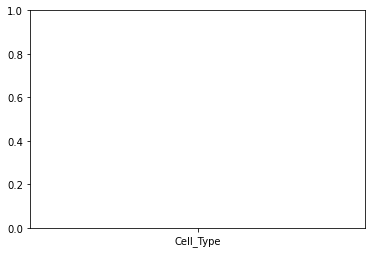

In [77]:
# plot1 = fine.plot.bar(x="Cell_Type", y="COL19A1", c = cellTypesDict_colors,
#         width = 0.4)

plt.bar(x="Cell_Type", y="COL19A1", c = cellTypesDict_colors,
        width = 0.4, height = 0.4)
# df.plot(x="Cell_Type", y=["COL19A1"])
plt.show()

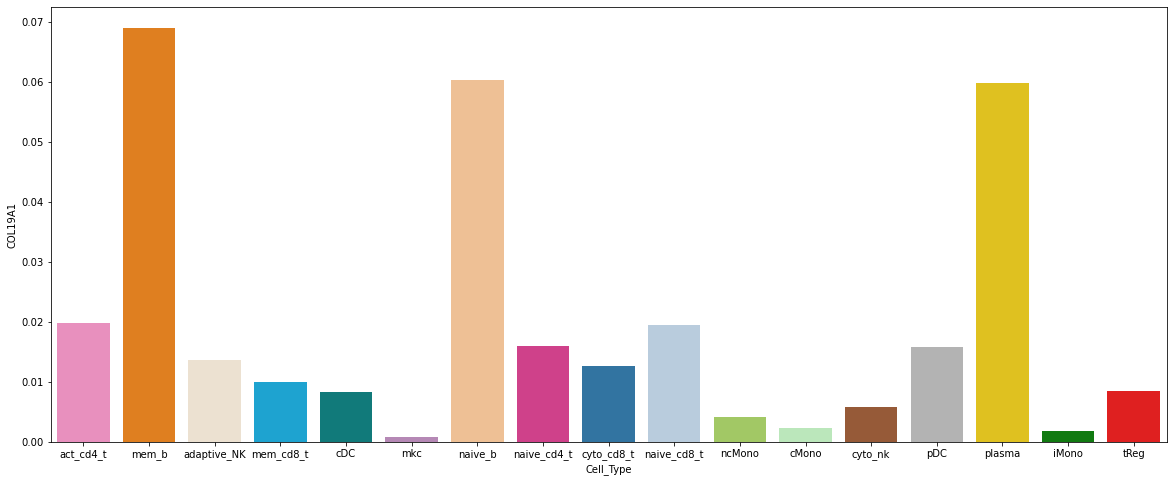

In [96]:
plot1 = sns.barplot(x = 'Cell_Type',
            y = 'COL19A1',
            data = fine, palette=fine_color_scaled, )
plt.gcf().set_size_inches(20, 8)



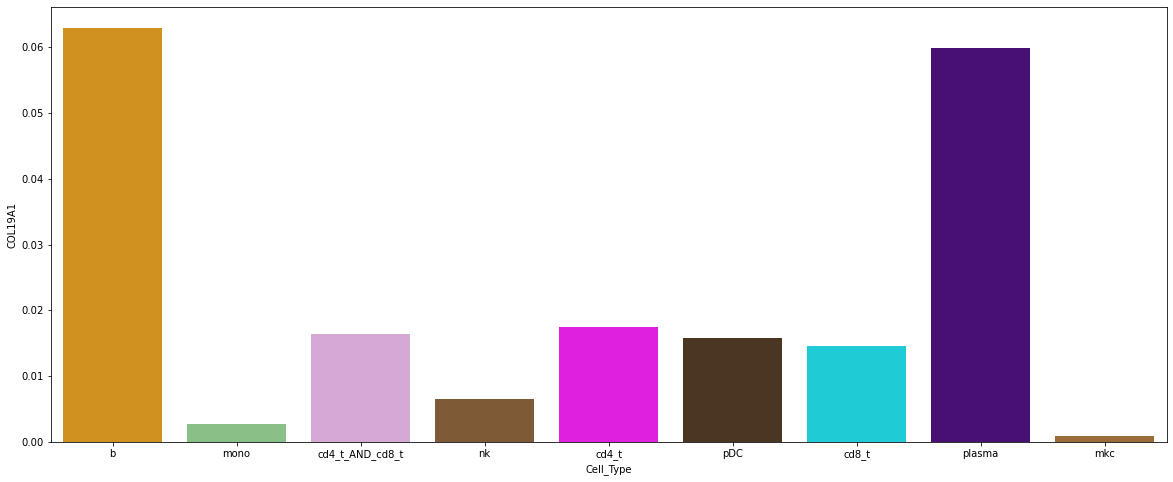

In [101]:
plot1 = sns.barplot(x = 'Cell_Type',
            y = 'COL19A1',
            data = broad, palette=broad_color_scaled, )
plt.gcf().set_size_inches(20, 8)



In [ ]:
newRowOrderFine = ['act_cd4_t', 'naive_cd4_t', 'tReg', 'mem_b',  'adaptive_NK', 'mem_cd8_t', 
            'cDC', 'mkc', 'naive_b',
             'cyto_cd8_t', 'naive_cd8_t', 'ncMono',  'cMono',  
            'cyto_nk', 'pDC', 'plasma',  'iMono'  ]

In [ ]:
fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9),
      (ax10, ax11, ax12),
      (ax13, ax14, ax15),
      (ax16, ax17, ax18),
      (ax19, ax20, ax21),
      (ax22, ax23, ax24)) = plt.subplots(8, 3)




data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")



# fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()